In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("restaurant_data.csv")
df.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['Cuisine'] = le.fit_transform(df['Cuisine'])
df['Parking Availability'] = le.fit_transform(df['Parking Availability'])

In [4]:
df = df.drop(columns=['Name', 'Social Media Followers'])
X = df.drop('Revenue',axis=1)
y = df['Revenue']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

In [8]:
model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Calculate the performance metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    adj_r2 = 1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    # Store the results
    model_results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2,
        "adj_r2": adj_r2
    }

# Step 6: Find the best model based on R-squared (or any other metric)
best_model = max(model_results, key=lambda k: model_results[k]['R2'])

# Display the results
print(f"Best Model: {best_model}\n")
print("Performance Metrics:")
print(pd.DataFrame(model_results).T)

Best Model: Random Forest

Performance Metrics:
                                    MAE           MSE           RMSE  \
Linear Regression          41766.815458  3.042928e+09   55162.739288   
Ridge Regression           41762.748522  3.042781e+09   55161.405389   
Lasso Regression           41766.515502  3.042910e+09   55162.577314   
Decision Tree              12286.418204  2.501826e+08   15817.160977   
Random Forest               6199.181927  6.518159e+07    8073.511726   
Gradient Boosting           7798.219786  1.062519e+08   10307.856058   
Support Vector Regressor  211174.725980  7.356549e+10  271229.585003   
K-Nearest Neighbors        68442.913033  7.753129e+09   88051.856087   

                                R2    adj_r2  
Linear Regression         0.957265  0.957026  
Ridge Regression          0.957267  0.957028  
Lasso Regression          0.957266  0.957026  
Decision Tree             0.996486  0.996467  
Random Forest             0.999085  0.999079  
Gradient Boosting    

In [9]:
score=r2_score(y_test,predictions)
score

0.8911157335791767

In [10]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8905050045207266

In [9]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
reg_pred=model.predict(X_test)

In [15]:
reg_pred

array([481306.8154, 293044.9198, 457119.4342, ..., 727193.5413,
       944115.1708, 998075.7866])

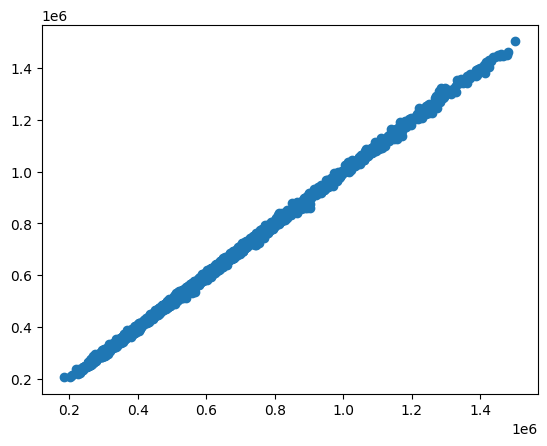

In [12]:
plt.scatter(y_test, reg_pred)

In [16]:
residuals=y_test-reg_pred
residuals

2412    -5378.2154
6832     7611.0702
5154      305.8758
7081      190.2619
6601   -12470.4009
           ...    
5540    -4237.9994
1789    -9502.7193
5629    -7868.9913
2059      650.3392
4487    -4564.4866
Name: Revenue, Length: 2511, dtype: float64

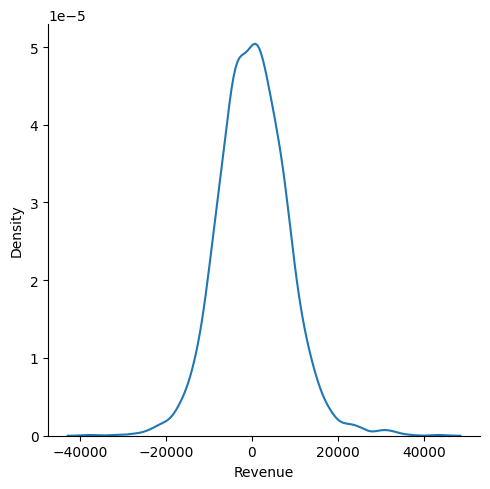

In [14]:
###ploting this residuals
sns.displot(residuals, kind="kde")

In [11]:
model.predict(sc.transform(X.iloc[0].values.reshape(1, -1)))

/home/joshua/.virtualenvs/ml/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([645928.2762])

### Pickling the model file for Deployment

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('randmodel.pkl','wb'))

In [ ]:
pickled_model=pickle.load(open('randmodel.pkl','rb'))

In [ ]:
pickled_model.predict(sc.transform(X.iloc[0].values.reshape(1, -1)))